In [57]:
print("Hare Krishna")

Hare Krishna


   # Predicting the Sales prices of BullDozers using Machine Learning

In [58]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## 1.Problem Defination

How well we can predict the sales price bulldozer given it's characteristics and previous examples of how much for bulldozers are sold for.

## 2.Data 
it is downloaded from kaggle[https://www.kaggle.com/competitions/bluebook-for-bulldozers/data]

## 3.Evaluation 
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.[https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation]

## 4.Features 
Kaggle provides a data dictionary that provides the details of all the attributes(stored in data folder or "https://www.kaggle.com/competitions/bluebook-for-bulldozers/data?select=Data+Dictionary.xlsx")

In [59]:
# importing data
df=pd.read_csv("./data/TrainAndValid.csv",low_memory=False)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [61]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

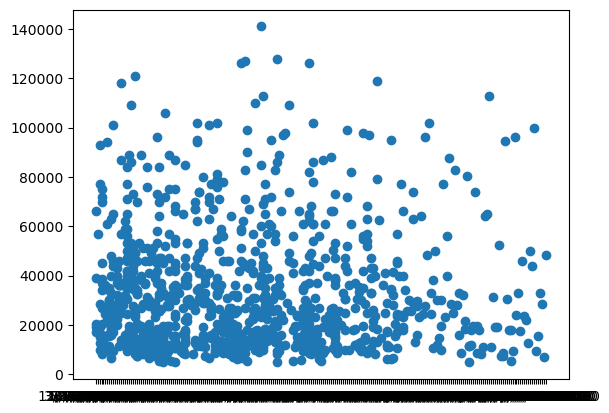

In [62]:
fig,ax=plt.subplots()

ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<AxesSubplot:ylabel='Frequency'>

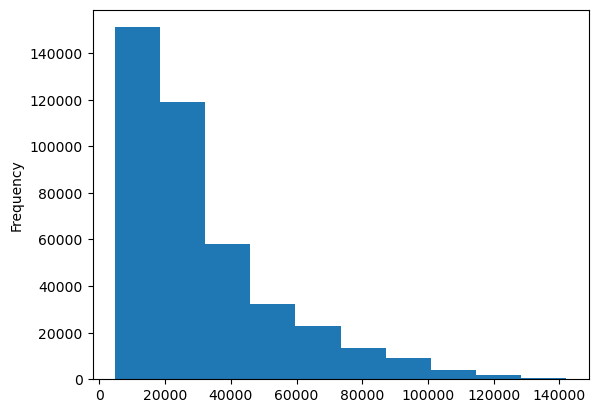

In [63]:
df["SalePrice"].plot.hist()

# Parsing dates

when we work with time series date,we want to enrich the time & date component as much as possible

In [64]:
# importing data
df=pd.read_csv("./data/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [65]:
df["saledate"]

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [66]:
df.saledate.dtype

dtype('<M8[ns]')

In [67]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [68]:
# sort the data on the basis of saledate

df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [69]:
# making a copy for exprimentation perpose
df_temp=df.copy()

In [70]:
df_temp.T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1998,2005,2005,2004,2000,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,...,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00


In [71]:
df_temp["saleYear"]=df_temp.saledate.dt.year
df_temp["saleMonth"]=df_temp.saledate.dt.month
df_temp["saleDay"]=df_temp.saledate.dt.day
df_temp["saleDayofWeek"]=df_temp.saledate.dt.dayofweek
df_temp["saleDayofYear"]=df_temp.saledate.dt.dayofyear


In [72]:
#df_temp.drop("saledate",axis=1,inplace=True)
df_temp["saleMonth"]

205615    1
274835    1
141296    1
212552    1
62755     1
         ..
410879    4
412476    4
411927    4
407124    4
409203    4
Name: saleMonth, Length: 412698, dtype: int64

In [73]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

# 5.Modelling

we've done enough for EDA for now let's get hands with model-driven EDA

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
model=RandomForestRegressor(n_jobs=-1,random_state=77)

In [76]:
model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

ValueError: could not convert string to float: 'Low'

# Convert String to Category

one way to convert all the string type to number is by making it pandas categories

In [77]:
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype("category").cat.as_ordered()

In [78]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 1

In [79]:
# thanks to pandas we internally categories are assigned a number

In [80]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

# saving the preprocessed data

In [81]:
df_temp.to_csv("data/train_temp.csv")

# filling missing values

## 1.numeric missing value

In [82]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # filling binary values for missing data
            df_temp[label+"_is_missing_"]=pd.isnull(content)
            #filling numeric value with median value
            df_temp[label]=content.fillna(content.median())

In [83]:
# median is more robust to outlayers than mean

In [84]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [85]:
df_temp["auctioneerID"].isna().sum()

0

In [86]:
df_temp.isna().sum()

SalesID                                      0
SalePrice                                    0
MachineID                                    0
ModelID                                      0
datasource                                   0
auctioneerID                                 0
YearMade                                     0
MachineHoursCurrentMeter                     0
UsageBand                               339028
saledate                                     0
fiModelDesc                                  0
fiBaseModel                                  0
fiSecondaryDesc                         140727
fiModelSeries                           354031
fiModelDescriptor                       337882
ProductSize                             216605
fiProductClassDesc                           0
state                                        0
ProductGroup                                 0
ProductGroupDesc                             0
Drive_System                            305611
Enclosure    

## 2.filling non-numeric data

In [87]:
for label,content in df_temp.items():
    if not pd.api.types.is_string_dtype(content):
            #filling missing value or not
            df_temp[label+"_is_missing_"]=pd.isnull(content)
            #filling numeric value with median value
            df_temp[label]=pd.Categorical(content).codes+1

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\1153483776.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_temp[label+"_is_missing_"]=pd.isnull(content)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\1153483776.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_temp[label+"_is_missing_"]=pd.isnull(content)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\1153483776.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

In [88]:
df_temp.isna().sum()

SalesID                                             0
SalePrice                                           0
MachineID                                           0
ModelID                                             0
datasource                                          0
                                                   ..
saleDay_is_missing_                                 0
saleDayofWeek_is_missing_                           0
saleDayofYear_is_missing_                           0
auctioneerID_is_missing__is_missing_                0
MachineHoursCurrentMeter_is_missing__is_missing_    0
Length: 118, dtype: int64

In [89]:
df_temp.shape

(412698, 118)

## now that all missing values are fill with values that can be used in modelling

In [90]:
%%time

# fitting the model
model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

CPU times: total: 39min 22s
Wall time: 6min 2s


RandomForestRegressor(n_jobs=-1, random_state=77)

In [91]:
# splitting data into train and valid split

df_temp["saleYear"]

205615     1
274835     1
141296     1
212552     1
62755      1
          ..
410879    24
412476    24
411927    24
407124    24
409203    24
Name: saleYear, Length: 412698, dtype: int8

In [92]:
df_temp_valid=df_temp[df_temp.saleYear==24]
df_temp_train=df_temp[df_temp.saleYear!=24]

In [93]:
df_temp_valid

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Travel_Controls_is_missing_,Differential_Type_is_missing_,Steering_Controls_is_missing_,saleYear_is_missing_,saleMonth_is_missing_,saleDay_is_missing_,saleDayofWeek_is_missing_,saleDayofYear_is_missing_,auctioneerID_is_missing__is_missing_,MachineHoursCurrentMeter_is_missing__is_missing_
405675,396806,620,348773,4920,6,30,55,1,0,3920,...,False,True,True,False,False,False,False,False,False,False
401133,23983,745,34525,4489,1,4,1,8010,2,3921,...,True,True,True,False,False,False,False,False,False,False
406076,397780,432,328231,2715,4,30,59,25,2,3921,...,True,True,True,False,False,False,False,False,False,False
409018,404219,588,290042,438,4,30,63,4372,3,3921,...,True,True,True,False,False,False,False,False,False,False
409026,404243,726,333824,2271,4,30,65,3468,3,3921,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,408631,256,339430,1260,4,30,60,1,0,4013,...,False,True,True,False,False,False,False,False,False,False
412476,412261,29,339788,3946,4,30,63,1,0,4013,...,True,True,True,False,False,False,False,False,False,False
411927,411130,256,339717,3542,4,30,63,1,0,4013,...,True,True,True,False,False,False,False,False,False,False
407124,400033,682,32720,742,4,30,52,1,0,4013,...,True,True,True,False,False,False,False,False,False,False


In [94]:
X_train=df_temp_train.drop("SalePrice",axis=1)
X_valid=df_temp_valid.drop("SalePrice",axis=1)
Y_train=df_temp_train["SalePrice"]
Y_valid=df_temp_valid["SalePrice"]

X_train.shape,X_valid.shape,Y_train.shape,Y_valid.shape

((401125, 117), (11573, 117), (401125,), (11573,))

In [95]:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def evalute(y_test,y_preds):
    """
        evalute the root mean square log error
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

In [96]:
def scoring(model):
    train_preds=model.predict(X_train)
    valid_preds=model.predict(X_valid)
    score={
        "Training MAE":mean_absolute_error(Y_train,train_preds),
        "Validating MAE":mean_absolute_error(Y_valid,valid_preds),
        "Training RMSLE":evalute(Y_train,train_preds),
        "Validating RMSLE":evalute(Y_valid,valid_preds),
        "Training R2 Score":r2_score(Y_train,train_preds),
        "Validating R2 Score":r2_score(Y_valid,valid_preds)
    }
    return score

# Hyper tuning our model on subset of data(as full dataset will take far to long)

In [97]:
%%time

model=RandomForestRegressor(n_jobs=-1,random_state=77,max_samples=30000)
model.fit(X_train,Y_train)

CPU times: total: 4min 34s
Wall time: 53.6 s


RandomForestRegressor(max_samples=30000, n_jobs=-1, random_state=77)

In [98]:
scoring(model)

{'Training MAE': 49.14979644749145,
 'Validating MAE': 64.14320573749245,
 'Training RMSLE': 0.2898769780370484,
 'Validating RMSLE': 0.3318202544894033,
 'Training R2 Score': 0.9081800928404226,
 'Validating R2 Score': 0.872195519562158}

In [99]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid={
    "n_estimators":np.arange(10,100,10),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,28,2),
    "max_features":["auto","sqrt",0.5,1],
    "max_samples":[10000]
}

rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=77),param_distributions=rf_grid,n_iter=2,cv=5,verbose=True)

rs_model.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\KIIT\Desktop\MachineLearning\MileStoneProject2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\Desktop\MachineLearning\MileStoneProject2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\Desktop\MachineLearning\MileStoneProject2\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, exp

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=77),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt', 0.5,
                                                         1],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [100]:
 scoring(rs_model)

{'Training MAE': 72.41360432022296,
 'Validating MAE': 84.68574591788565,
 'Training RMSLE': 0.3735404062367615,
 'Validating RMSLE': 0.38847431769859253,
 'Training R2 Score': 0.8151686816971447,
 'Validating R2 Score': 0.7776348481704118}

In [101]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 14,
 'min_samples_leaf': 19,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

# Training a model with the best hyperparameters
### Note: These were found after 100 iterations of RandomizedSearchCV

In [152]:
%%time

#most ideal hyperparameters
ideal_model=RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                  min_samples_split=14,
                                  max_features=0.5,
                                  n_jobs=-1,
                                  max_samples=None,
                                  random_state=42)

# fit the ideal model
ideal_model.fit(X_train,Y_train)

CPU times: total: 5min 12s
Wall time: 44.8 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

# Testing with Test Data

In [133]:
test=pd.read_csv("./data/Test.csv",low_memory=False,parse_dates=["saledate"])

# preprocessing test data

In [104]:
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        test[label]=content.astype("category").cat.as_ordered()

In [105]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # filling binary values for missing data
            test[label+"_is_missing_"]=pd.isnull(content)
            #filling numeric value with median value
            test[label]=content.fillna(content.median())

In [106]:
for label,content in df_temp.items():
    if not pd.api.types.is_string_dtype(content):
            #filling missing value or not
            test[label+"_is_missing_"]=pd.isnull(content)
            #filling numeric value with median value
            test[label]=pd.Categorical(content).codes+1

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\1843661865.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[label+"_is_missing_"]=pd.isnull(content)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\1843661865.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[label+"_is_missing_"]=pd.isnull(content)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\1843661865.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\1843661865.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[label+"_is_missing_"]=pd.isnull(content)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\1843661865.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[label+"_is_missing_"]=pd.isnull(content)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\1843661865.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\1843661865.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[label+"_is_missing_"]=pd.isnull(content)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\1843661865.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[label+"_is_missing_"]=pd.isnull(content)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\1843661865.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\1843661865.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[label+"_is_missing_"]=pd.isnull(content)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\1843661865.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[label+"_is_missing_"]=pd.isnull(content)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\1843661865.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

In [136]:
def preprocessing(df_temp):
    #creating fields
    df_temp["saleYear"]=df_temp.saledate.dt.year
    df_temp["saleMonth"]=df_temp.saledate.dt.month
    df_temp["saleDay"]=df_temp.saledate.dt.day
    df_temp["saleDayofWeek"]=df_temp.saledate.dt.dayofweek
    df_temp["saleDayofYear"]=df_temp.saledate.dt.dayofyear
    
    #df.drop("saledate",axis=1,inplace=True)
    
    #converting String to category type
    for label,content in df_temp.items():
        if pd.api.types.is_string_dtype(content):
            df_temp[label]=content.astype("category").cat.as_ordered()
        
    #fill all the numeric missing data    
    for label,content in df_temp.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # filling binary values for missing data
                df_temp[label+"_is_missing_"]=pd.isnull(content)
                #filling numeric value with median value
                df_temp[label]=content.fillna(content.median())
            
    #fill all the non-numeric data internally missing category code is 0 
    for label,content in df_temp.items():
        if not pd.api.types.is_string_dtype(content):
            #filling missing value or not
            df_temp[label+"_is_missing_"]=pd.isnull(content)
            #filling numeric value with median value
            df_temp[label]=pd.Categorical(content).codes+1
            
    return df_temp

In [137]:
df_test=preprocessing(test)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\3689368595.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_temp[label+"_is_missing_"]=pd.isnull(content)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\3689368595.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_temp[label+"_is_missing_"]=pd.isnull(content)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13204\3689368595.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

In [146]:
ideal_model.fit(df_test)

TypeError: BaseForest.fit() missing 1 required positional argument: 'y'

In [145]:
# finding missing columns
set(X_train.columns) - set(df_test.columns)
# df_test["SalePrice_is_missing_"]=False
# df_test["auctioneerID_is_missing__is_missing_"]=False

set()

In [153]:
ideal_model.predict(df_test)

C:\Users\KIIT\Desktop\MachineLearning\MileStoneProject2\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([224.7822091 , 381.9037889 , 693.83598006, ..., 389.77874269,
       521.61653954, 532.25929417])

In [154]:
test_preds=ideal_model.predict(df_test)

C:\Users\KIIT\Desktop\MachineLearning\MileStoneProject2\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [156]:
df_preds=pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalesPrice"]=test_preds
df_preds

,SalesID,SalesPrice
0,1,224.782209
1,2,381.903789
2,3,693.835980
3,4,695.585608
4,5,464.351645
...,...,...
12452,12453,570.515791
12453,12454,451.879528
12454,12455,389.778743
12455,12456,521.616540


In [157]:
df_preds.to_csv("./data/AryaModelPreds.csv")

In [158]:
import pickle

pickle.dump(ideal_model,open("Aryamodel.pkl","wb"))

# Feature Importance

In [159]:
ideal_model.feature_importances_

array([2.58838482e-02, 1.26673522e-02, 5.55095362e-02, 1.19604387e-03,
       3.02640192e-03, 1.73135045e-01, 2.14712469e-03, 5.96758486e-04,
       5.28159740e-02, 3.36871629e-02, 2.07537400e-02, 5.34160903e-02,
       4.86793131e-03, 2.91667051e-02, 8.76552814e-02, 8.49352083e-02,
       5.12250448e-03, 2.54113091e-03, 1.16724768e-02, 7.34480088e-03,
       2.97435180e-02, 2.72468612e-04, 6.82090271e-05, 4.19063836e-04,
       3.82967343e-04, 9.43189427e-04, 6.23833350e-04, 2.86979931e-04,
       4.03830960e-04, 2.49397644e-04, 2.92428721e-04, 5.49683780e-03,
       3.04249921e-04, 2.60363142e-03, 4.45054472e-04, 3.07750319e-04,
       7.35833312e-03, 1.37161048e-03, 5.65801080e-02, 3.29983362e-02,
       9.38086218e-03, 5.31033348e-03, 9.60777721e-04, 2.44909468e-03,
       4.60795810e-04, 8.66197763e-04, 2.28568757e-04, 2.42267845e-04,
       1.28588842e-03, 1.91765548e-03, 1.68590321e-04, 3.55967526e-04,
       2.18780314e-02, 2.22425579e-03, 4.69657712e-03, 2.32426085e-03,
      

In [167]:
# Helper function for plotting feature importance
def plot_feature(columns,importances,n=20):
    df=(pd.DataFrame({"features":columns,"feature_importances":importances}).sort_values("feature_importances",ascending=False)).reset_index(drop=True)
    
    #ploting the dataframe
    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")

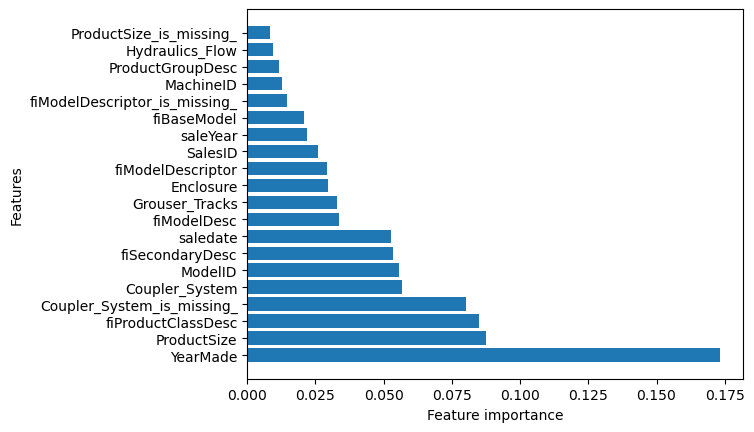

In [168]:
 plot_feature(X_train.columns,ideal_model.feature_importances_)